### Nama : Ricky Akbar Pratama

### NIM    : 09011381823082

### SK5 Bukit

# Support Vector Machine

Support Vector Machine (SVM) merupakan salah satu metode dalam supervised learning yang biasanya digunakan untuk klasifikasi (seperti Support Vector Classification) dan regresi (Support Vector Regression). SVM juga dapat mengatasi masalah klasifikasi dan regresi dengan linear maupun non linear.SVM digunakan untuk mencari hyperplane terbaik dengan memaksimalkan jarak antar kelas. Hyperplane adalah sebuah fungsi yang dapat digunakan untuk pemisah antar kelas. yang akan saya lakukan adalah kalsifikasi dengan linear

### Import library yang akan di gunakan

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
import pickle

### load dataset 

- sumber dataset: https://www.kaggle.com/nehaprabhavalkar/indian-food-101

In [2]:
df = pd.read_csv("indian_food.csv")

In [3]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,1
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,1
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,1
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,1
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,1


fungsi dari df.head() adalah untuk melihat data teratas

In [4]:
df.tail()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,23,30,sweet,dessert,0
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,0
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,12,45,sweet,dessert,1
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,1
254,Pinaca,"Brown rice, fennel seeds, grated coconut, blac...",vegetarian,45,35,sweet,dessert,1


fungsi dari df.tail adalah untuk melihat data terbawah

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 16.1+ KB


df.info ini berfungsi untuk melihat info dari data set tersebut

In [6]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
dtype: int64

berfungsi untuk melihat nilai null


In [7]:
df.shape

(255, 8)

In [8]:
df.dtypes

name              object
ingredients       object
diet              object
prep_time          int64
cook_time          int64
flavor_profile    object
course            object
state              int64
dtype: object

In [9]:
df.describe()

,prep_time,cook_time,state
count,255.000000,255.000000,255.000000
mean,36.737255,42.729412,0.494118
std,71.894975,61.974859,0.500949
min,5.000000,2.000000,0.000000
25%,10.000000,25.000000,0.000000
50%,15.000000,30.000000,0.000000
75%,30.000000,45.000000,1.000000
max,500.000000,720.000000,1.000000


In [10]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,1
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,1
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,1
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,1
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,1


## Plot

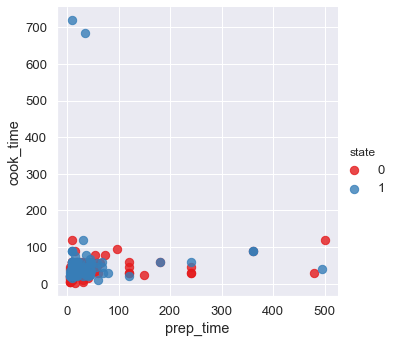

In [11]:
# Plot two ingredients
sns.lmplot('prep_time', 'cook_time', data= df, hue='state',palette='Set1', fit_reg=False, scatter_kws={"s": 70});

## pairplot

Pair Plots adalah cara yang sangat sederhana Untuk memvisualisasikan hubungan antara setiap variabel. Ini menghasilkan matriks hubungan antara setiap variabel dalam data Anda untuk pemeriksaan instan data. Ini juga bisa menjadi titik awal yang bagus untuk menentukan jenis analisis regresi yang akan digunakan.

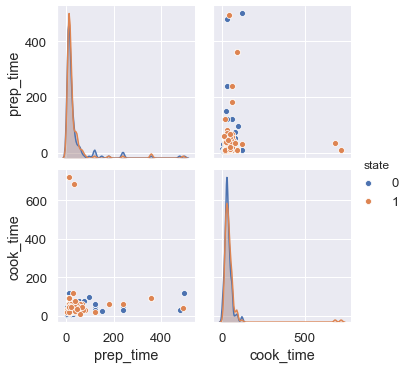

In [12]:
import seaborn as sn
sn.pairplot(df,hue='state')

In [13]:
x = df.iloc[:,[3,4]].values
#x
y = df.iloc[:,7].values
#y

### Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state =1)
x_train.shape
#x_test.shape
#y_train.shape
#y_test.shape

(191, 2)

split dataset into the training set and test set ini berfungsi untuk membagi data X dan data y untuk ditraning dan ditesting. Training set adalah bagian dataset yang kita latih untuk membuat prediksi atau menjalankan fungsi.memberikan petunjuk melalui algoritma agar mesin yang kita latih bisa mencari korelasinya sendiri atau belajar pola dari data yang diberikan.Test set adalah bagian dataset yang kita tes untuk melihat keakuratannya, atau dengan kata lain melihat performanya.

- X_train = Variable independent untuk latihan

- X_test = Variable independent untuk uji coba

- y_train = Variable dependent untuk latihan

- y_test = Variable dependent untuk uji coba


### Feature Scaling

Feature Scaling adalah suatu cara untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama. Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya.

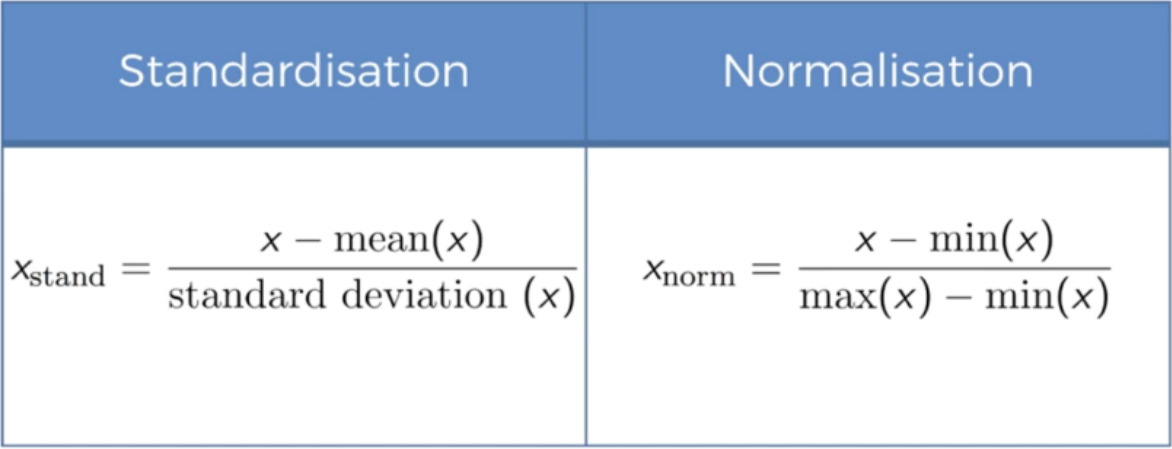

In [15]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
#sc_x
#x_train
#x_test

### Fitting the classifier into the Training set

In [16]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state =1)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=1)

### Predicting the test set results

In [17]:
y_predict = classifier.predict(x_test)
#y_predict

### Making the Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[21, 12],
       [18, 13]], dtype=int64)

### Model Accuracy

In [19]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.53125


### Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


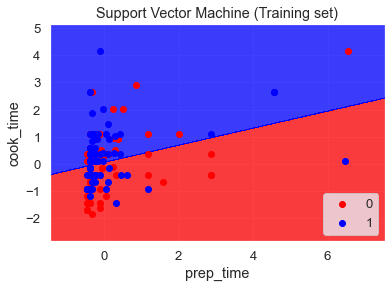

In [20]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('prep_time')
plt.ylabel('cook_time')
plt.legend()
plt.show()

### Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


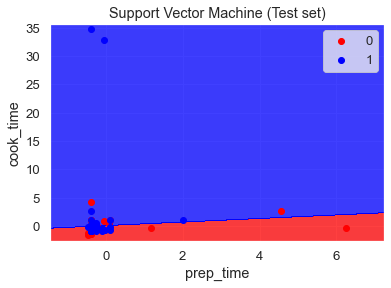

In [21]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('prep_time')
plt.ylabel('cook_time')
plt.legend()
plt.show()

Apabila data terpisah secara linier, maka fungsi pemisah/hyperplane 
didefinisikan sebagai berikut:
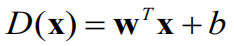

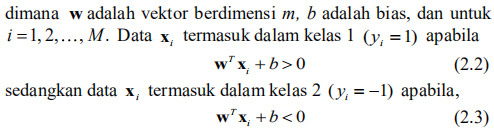

Untuk menyelesaikan pemrograman kuadrat tersebut, cara yang umum digunakan adalah mencari bentuk dual dengan menggunakan 
perkalian Lagrange (Lagrange multipliers) an≥0, dengan satu pengali Lagrange untuk setiap kendala, untuk membentuk fungsi Lagrangian (Lagrangian function) sbb:
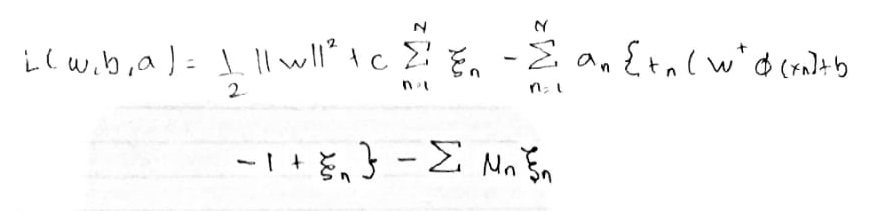

Dengan menurunkan L(w, b, a) terhadap w dan b sama dengan nol, maka:
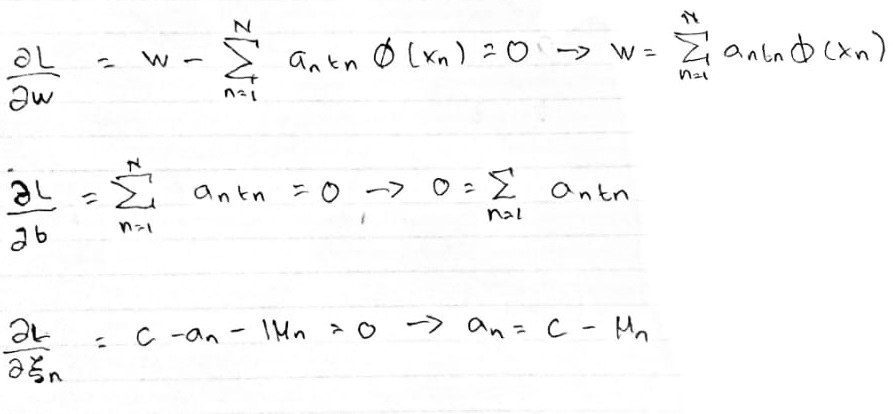

Model yang umum digunakan untuk menyelesaikan masalah klasifikasi dan regresi adalah model linear, yaitu model yang merupakan kombinasi linear dari fungsi basis:
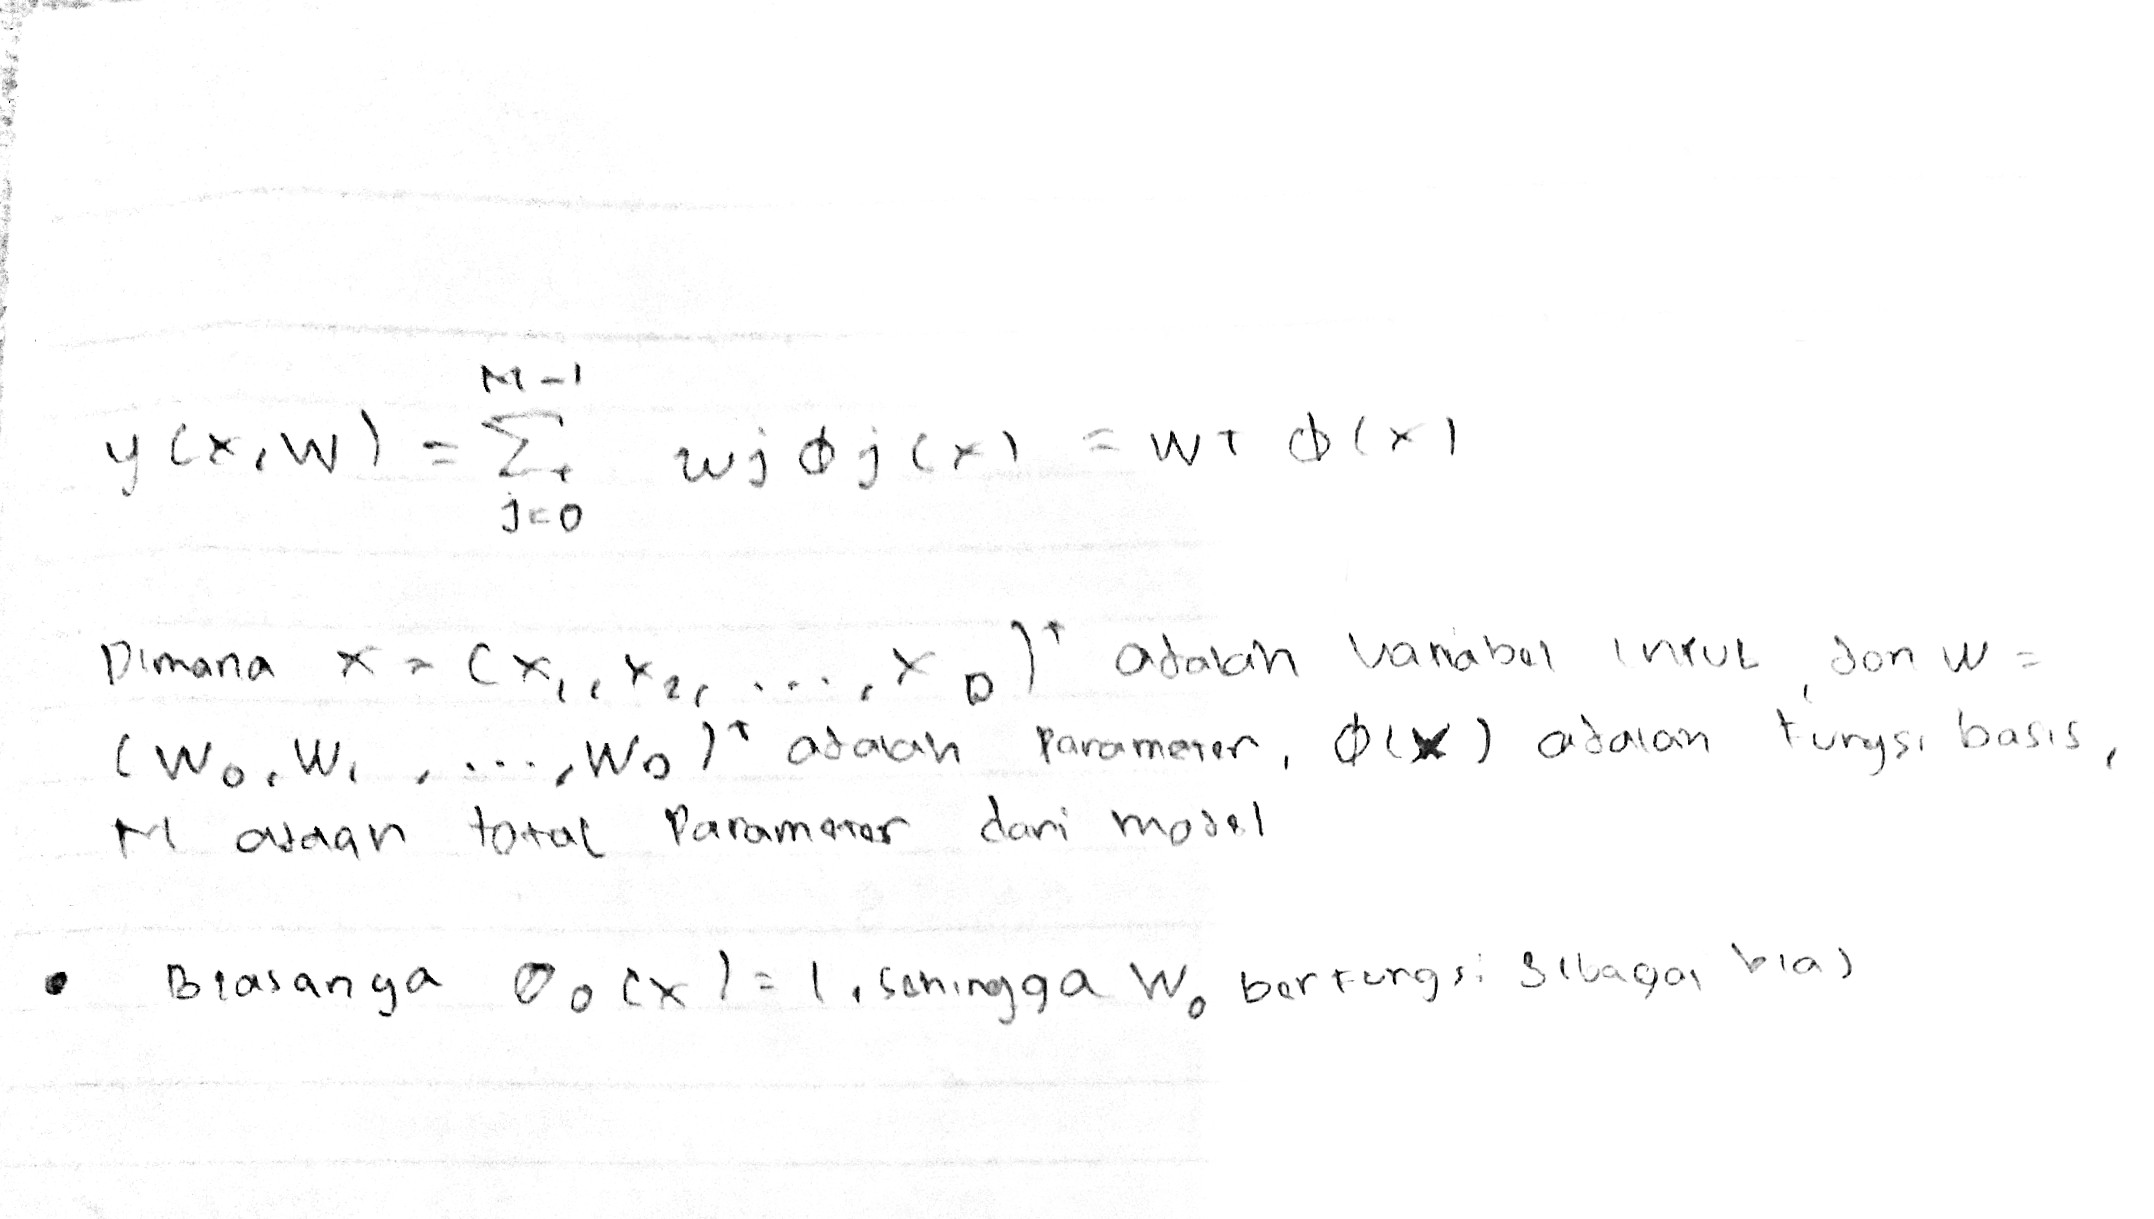

### Calculating F1_Score

 F1-Score adalah harmonic mean dari precision dan recall. Yang secara matematik dapat ditulis begini:
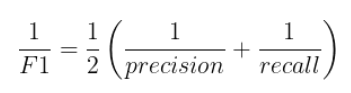
 Nilai terbaik F1-Score adalah 1.0 dan nilai terburuknya adalah 0. Secara representasi, jika F1-Score punya skor yang baik mengindikasikan bahwa model klasifikasi kita punya precision dan recall yang baik.

In [22]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict, average='macro')

0.5238095238095238

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

###  confusion matrix

Confusion matrix juga sering disebut error matrix. Pada dasarnya confusion matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya. Confusion matrix berbentuk tabel matriks yang menggambarkan kinerja model klasifikasi pada serangkaian data uji yang nilai sebenarnya diketahui.Terdapat 4 istilah sebagai representasi hasil proses klasifikasi pada confusion matrix. Keempat istilah tersebut adalah True Positive (TP), True Negative (TN), False Positive (FP) dan False Negative (FN).

              precision    recall  f1-score   support

           0       0.54      0.64      0.58        33
           1       0.52      0.42      0.46        31

    accuracy                           0.53        64
   macro avg       0.53      0.53      0.52        64
weighted avg       0.53      0.53      0.53        64

Confusion matrix, without normalization
[[21 12]
 [18 13]]


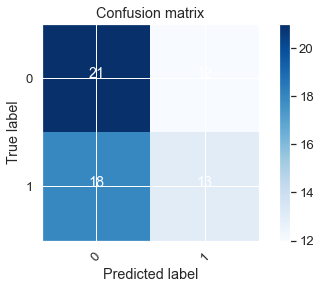

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion matrix')

- True Positive (TP)
Merupakan data positif yang diprediksi benar. 
- True Negative (TN)
Merupakan data negatif yang diprediksi benar.
- False Postive (FP) — Type I Error
Merupakan data negatif namun diprediksi sebagai data positif. 
- False Negative (FN) — Type II Error
Merupakan data positif namun diprediksi sebagai data negatif.

manfaat dari confusion matrix:
- Menunjukkan bagaimana model ketika membuat prediksi.
- Tidak hanya memberi informasi tentang kesalahan yang dibuat oleh model tetapi juga jenis kesalahan yang dibuat.
- Setiap kolom dari confusion matrix merepresentasikan instance dari kelas prediksi.
- Setiap baris dari confusion matrix mewakili instance dari kelas aktual.

### Accuracy

Accuracy menggambarkan seberapa akurat model dapat mengklasifikasikan dengan benar.
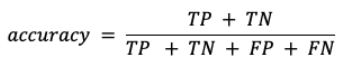

### Precision (Positive Predictive Value)

Precision menggambarkan tingkat keakuratan antara data yang diminta dengan hasil prediksi yang diberikan oleh model.
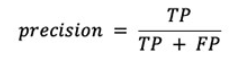

### Recall atau Sensitivity (True Positive Rate)
Recall menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi.
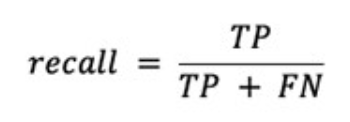

### sumber : https://github.com/alimdsaif3/SVM_Model_Classification_Linear